In [0]:
# installation of lightgbm on Google Collab
!apt-get -qq install --no-install-recommends nvidia-375
!apt-get -qq install --no-install-recommends nvidia-opencl-icd-375 nvidia-opencl-dev opencl-headers
!apt-get -qq install --no-install-recommends git cmake build-essential libboost-dev libboost-system-dev libboost-filesystem-dev
!pip3 install -qq lightgbm --install-option=--gpu

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

import lightgbm as lgb

%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 8]

In [0]:
# import data and split label and image
# train = pd.read_csv("../input/train.csv")
path = "drive/Computers/Mon MacBook Air/ml-discover"
train = pd.read_csv(path + "/input/train.csv")
test = pd.read_csv(path + "/input/test.csv")

In [0]:
X_train = train.iloc[: 8000,1:].values.astype("float32")
label = train.iloc[: 8000, :1].values.astype("int32")
X_test = test.iloc[:8000,:].values.astype("float32")

In [0]:
scale = np.max(X_train)
X_train /= scale
X_test /= scale

mean = np.std(X_train)
X_train -= mean
X_test -= mean

In [8]:
label

array([[1],
       [0],
       [1],
       ...,
       [4],
       [7],
       [9]], dtype=int32)

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_train, label, test_size=0.2, random_state=0)

In [0]:
train_data = lgb.Dataset(X_train, label=y_train.ravel())
val_data = lgb.Dataset(X_val, label=y_val.ravel()) #to set param 'valid_sets' in model

In [0]:
#setting parameters for lightgbm
param = {'boosting_type': 'gbdt',
         'application':'multiclass',
         'metric': 'multi_logloss',
         'learning_rate':0.05,
         'num_leaves':100,
         'min_data_in_leaf':150,
         'max_depth':-1,
         'bagging_fraction':0.7,
         'feature_fraction':0.7,
         'max_bin':200,
         'num_class': 10,
         'random_state': 42}

In [0]:
lgbm = lgb.train(param, train_data, 1000, verbose_eval=100)

In [22]:
nb_trees = lgbm.best_iteration
nb_trees

0

In [0]:
y_pred = lgbm.predict(X_val, num_iteration=nb_trees)

In [0]:
y_pred = np.argmax( y_pred, axis=1 )

In [25]:
print("mean accuracy: ", accuracy_score(y_val, y_pred))

mean accuracy:  0.95875


In [0]:
def show_detail_digit(data_test, results_of_model, number_of_digit):
    index_of_digit = [results_of_model == number_of_digit][0]
    f, axes = plt.subplots(9,9, sharex=True, sharey=True, figsize=(16,8))
    for r in range(9):
        for c in range(9):
            img = data_test.reshape([data_test.shape[0],28,28])[index_of_digit][r*9+c]
            axes[r,c].imshow(img, cmap='binary')
            plt.xticks([])
            plt.yticks([])

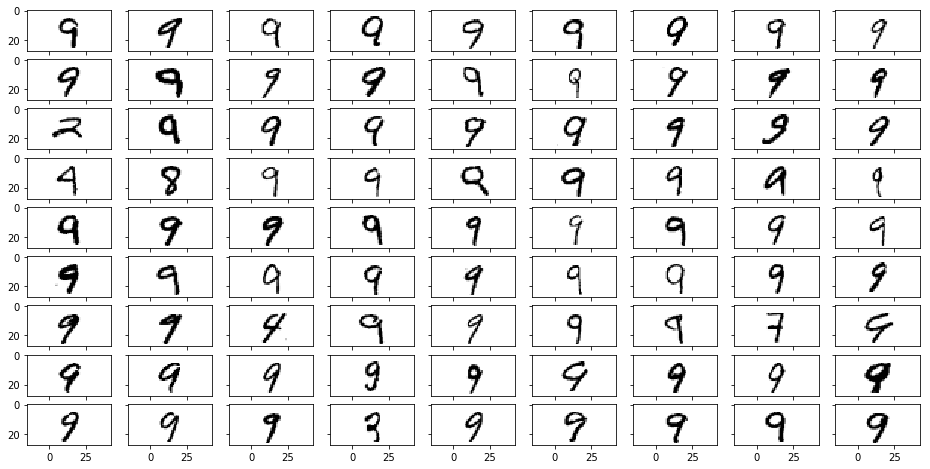

In [0]:
show_detail_digit(X_val, y_pred, 9)